- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling

In [ ]:
# Add the src directory to sys.path
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re
import seaborn as sns

### Microscopy data processing

In [2]:
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

In [3]:
templates = [template1, template2, template3]

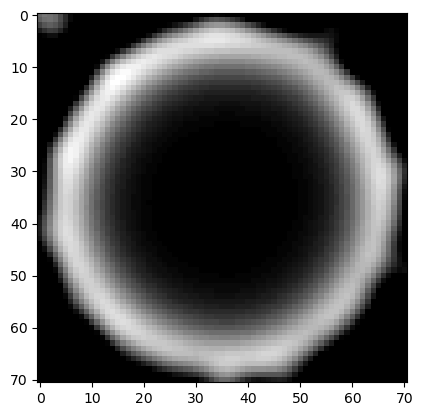

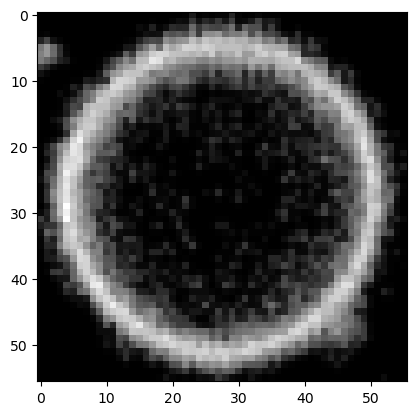

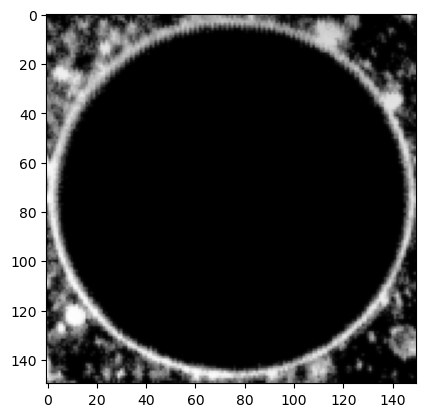

In [4]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [10]:
file_folder= '../../data/20240531/OriginalImage/20240531_094409_991'
PlateName='Plate_20240531'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)

import time
start_time = time.time()
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5, Preprocess=True)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

None vesicles found
WellK14_PointK14_0000_ChannelNile Red_Seq0680.ome.tiff
None vesicles found
WellH04_PointH04_0003_ChannelNile Red_Seq0475.ome.tiff
None vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
None vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
None vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
None vesicles found
WellK05_PointK05_0001_ChannelNile Red_Seq0645.ome.tiff
None vesicles found
WellH09_PointH09_0000_ChannelNile Red_Seq0452.ome.tiff
None vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
None vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
None vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
None vesicles found
WellI20_PointI20_0003_ChannelNile Red_Seq0551.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
None vesicles found
WellC21_PointC21_0000_ChannelNile Red_Seq0072.ome.tiff
None vesicles found
WellJ

### Data construction

In [14]:
df = pd.read_csv('../../data/20240531/VesicleDetection/Results_Plate_20240531/Plate_20240531_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellK14_PointK14_0000_ChannelNile Red_Seq0680....,0,0.0,0.0
1,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,0,0.0,0.0
2,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,0,0.0,0.0
3,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,0,0.0,0.0
4,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,0,0.0,0.0
...,...,...,...,...
763,WellG13_PointG13_0001_ChannelNile Red_Seq0361....,0,0.0,0.0
764,WellL09_PointL09_0001_ChannelNile Red_Seq0741....,0,0.0,0.0
765,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,0,0.0,0.0
766,WellK07_PointK07_0003_ChannelNile Red_Seq0655....,0,0.0,0.0


In [18]:
df_sorted = df.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.0,0.0
1,C04,0,0.0,0.0
2,C05,0,0.0,0.0
3,C06,0,0.0,0.0
4,C07,0,0.0,0.0
...,...,...,...,...
187,L11,0,0.0,0.0
188,L12,0,0.0,0.0
189,L13,0,0.0,0.0
190,L14,0,0.0,0.0


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

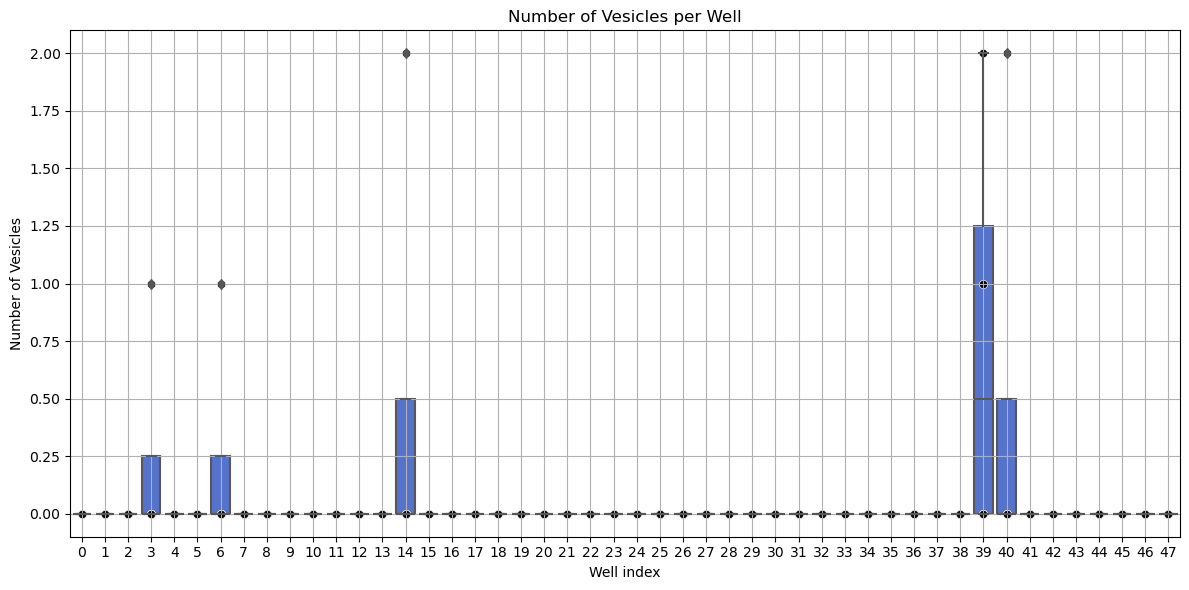

In [19]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_final.index % 48, y='num_vesicles', data=df_final, color='royalblue')

# Scatter plot without NaN values
sns.scatterplot(x=df_final.index % 48, y='num_vesicles', data=df_final.dropna(), color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
num_rows_per_df = 48
numeric_df = df_final.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
5,0.0,0.000000,0.000000
6,0.0,0.000000,0.000000
7,0.0,0.000000,0.000000
8,0.0,0.000000,0.000000
9,0.0,56.745017,0.000054


In [21]:
dispense_df = pd.read_csv('dispense_df_GPC_20240528.csv')
dispense_df

,decanoic acid_Concentration (50 mM),decanoic acid_Concentration (10 mM),decanoic acid_Concentration (2 mM),decanoate_Concentration (50 mM),decanoate_Concentration (10 mM),decanoate_Concentration (2 mM),decylamine_Concentration (50 mM),decylamine_Concentration (10 mM),decylamine_Concentration (2 mM),decyl trimethylamine_Concentration (50 mM),decyl trimethylamine_Concentration (10 mM),decyl trimethylamine_Concentration (2 mM),decylsulfate_Concentration (50 mM),decylsulfate_Concentration (10 mM),decylsulfate_Concentration (2 mM),decanol_Concentration (15 mM),decanol_Concentration (3 mM),monocaprin_Concentration (10 mM),monocaprin_Concentration (2 mM)
0,0.0,9.2,0.0,0.0,8.4,0.0,0.0,19.9,0.0,0.0,19.2,0.0,0.0,18.9,0.0,4.0,0.0,15.9,0.0
1,0.0,16.3,0.0,0.0,14.4,0.0,0.0,17.3,0.0,0.0,16.9,0.0,0.0,18.5,0.0,0.0,12.6,4.5,0.0
2,0.0,17.1,0.0,0.0,8.0,0.0,0.0,19.8,0.0,0.0,18.6,0.0,0.0,16.7,0.0,0.0,16.6,11.4,0.0
3,0.0,14.4,0.0,0.0,11.1,0.0,0.0,10.8,0.0,0.0,16.0,0.0,0.0,17.5,0.0,0.0,8.0,13.7,0.0
4,0.0,15.7,0.0,0.0,0.0,4.4,0.0,18.0,0.0,0.0,17.5,0.0,0.0,15.6,0.0,0.0,3.7,17.2,0.0
5,0.0,14.3,0.0,0.0,20.0,0.0,0.0,11.3,0.0,0.0,18.4,0.0,0.0,12.2,0.0,0.0,8.3,19.6,0.0
6,0.0,15.6,0.0,0.0,7.2,0.0,0.0,17.9,0.0,0.0,17.4,0.0,0.0,17.3,0.0,4.6,0.0,19.5,0.0
7,0.0,12.1,0.0,0.0,15.3,0.0,0.0,6.7,0.0,0.0,17.3,0.0,0.0,19.4,0.0,0.0,18.0,15.7,0.0
8,0.0,11.0,0.0,0.0,18.2,0.0,0.0,13.4,0.0,0.0,11.7,0.0,0.0,18.2,0.0,0.0,3.6,17.7,0.0
9,0.0,9.4,0.0,0.0,6.8,0.0,0.0,15.8,0.0,0.0,19.9,0.0,0.0,17.4,0.0,0.0,1.9,8.5,0.0


In [22]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_con_column = solute + '_Concentration (mM)'
    result_df[total_con_column] = (dispense_df[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
# Divide all column values by 200
result_df = result_df.div(200)
result_df

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM)
0,0.460,0.420,0.995,0.960,0.945,0.3000,0.795
1,0.815,0.720,0.865,0.845,0.925,0.1890,0.225
2,0.855,0.400,0.990,0.930,0.835,0.2490,0.570
3,0.720,0.555,0.540,0.800,0.875,0.1200,0.685
4,0.785,0.044,0.900,0.875,0.780,0.0555,0.860
5,0.715,1.000,0.565,0.920,0.610,0.1245,0.980
6,0.780,0.360,0.895,0.870,0.865,0.3450,0.975
7,0.605,0.765,0.335,0.865,0.970,0.2700,0.785
8,0.550,0.910,0.670,0.585,0.910,0.0540,0.885
9,0.470,0.340,0.790,0.995,0.870,0.0285,0.425


In [23]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles,area_vesicles,area_percent
0,0.460,0.420,0.995,0.960,0.945,0.3000,0.795,0.0,0.000000,0.000000
1,0.815,0.720,0.865,0.845,0.925,0.1890,0.225,0.0,0.000000,0.000000
2,0.855,0.400,0.990,0.930,0.835,0.2490,0.570,0.0,0.000000,0.000000
3,0.720,0.555,0.540,0.800,0.875,0.1200,0.685,0.0,0.000000,0.000000
4,0.785,0.044,0.900,0.875,0.780,0.0555,0.860,0.0,0.000000,0.000000
5,0.715,1.000,0.565,0.920,0.610,0.1245,0.980,0.0,0.000000,0.000000
6,0.780,0.360,0.895,0.870,0.865,0.3450,0.975,0.0,0.000000,0.000000
7,0.605,0.765,0.335,0.865,0.970,0.2700,0.785,0.0,0.000000,0.000000
8,0.550,0.910,0.670,0.585,0.910,0.0540,0.885,0.0,0.000000,0.000000
9,0.470,0.340,0.790,0.995,0.870,0.0285,0.425,0.0,56.745017,0.000054


In [24]:
df_combine.to_csv('df_combine_20240601.csv', index=False)

In [1]:
import pandas as pd
df_combine = pd.read_csv('df_combine_20240601.csv')
df_concentration = df_combine.iloc[:,0:7]
df_concentration.to_csv('df_concentration_20240601.csv', index=False)